In [16]:
import numpy as np
import sys
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
np.set_printoptions(threshold=sys.maxsize) # show full ndarray

# Prior Simulation

In [28]:
def prior_simulation(focal_length):
    # Please Do Not run this as the Snapshots are large and git ignored.
    directory = '../Snapshots/Snapshots-'+focal_length+'/'
    prior_mean = np.empty([512, ])
    # iterate over each snapshot
    initialise = True
    for filename in os.listdir(directory):
        if filename == '.DS_Store':
            continue
    #     snapshot = np.flip(np.load(directory+filename), axis=0) # the deep map origin is on the top
        snapshot = np.load(directory+filename)# the deep map origin is on the top

        snapshot = snapshot[:, 255] # take the middle column
        if initialise is True:
            prior = snapshot
            initialise = False
        else:
            prior = np.vstack((prior, snapshot))  

    prior = np.ma.masked_invalid(prior.T) # ignore inf depths
    for iy, ix in np.ndindex(prior.shape):
    #     print(prior[iy])
    #     print(np.average(prior[iy][prior[iy]<=300]))
        prior_mean[iy] = np.average(prior[iy][prior[iy]<=300]) # ignore distance > 300

    height = np.array(range(512))
    prior_dist = np.append(height[:, None], prior_mean[:, None], axis=1)

    column_values = ['Height', 'Distance']

    # creating the dataframe
    prior_dist_df = pd.DataFrame(data = prior_dist, 
                      columns = column_values)

    prior_dist_df.to_pickle('prior_dist_'+focal_length) 

## f=16

/var/folders/2h/6xl9zzd51h753mb206k2zn4r0000gn/T/ipykernel_31417/2745794787.py:24: UserWarning: Warning: converting a masked element to nan.
  prior_mean[iy] = np.average(prior[iy][prior[iy]<=300]) # ignore distance > 300


<AxesSubplot:xlabel='Distance', ylabel='Height'>

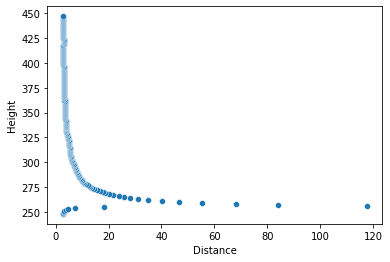

In [29]:
prior_simulation('16')
prior_dist_df_16 = pd.read_pickle('prior_dist_16')
sns.scatterplot(data=prior_dist_df_16, x="Distance", y="Height")

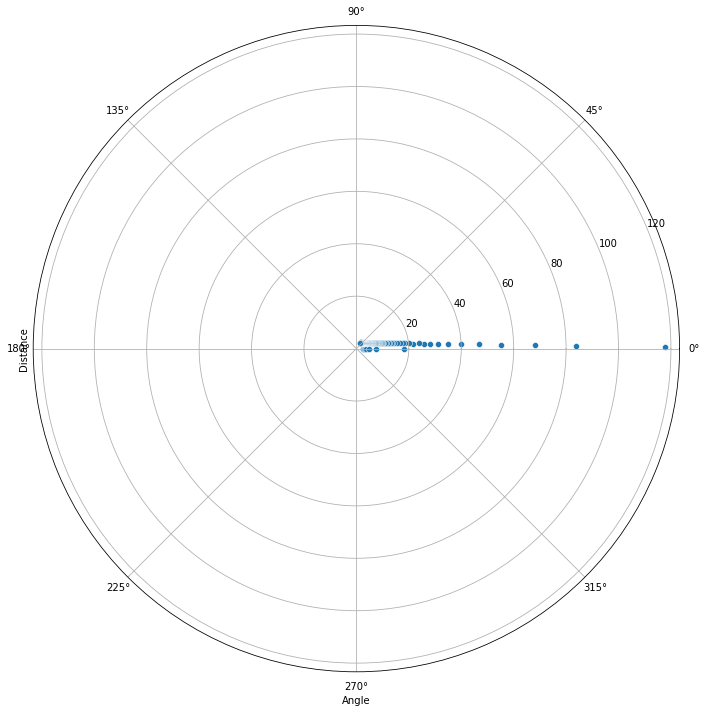

In [27]:
prior_dist_df_16["TransformedHeight"] = prior_dist_df_16["Height"] - 256
prior_dist_df_16["Angle"] = np.arctan((prior_dist_df_16["TransformedHeight"] + 0.5)/16)

# plot in polar coordinates
g = sns.FacetGrid(prior_dist_df_16, subplot_kws=dict(projection='polar'), height=10, despine=False)
g.map_dataframe(sns.scatterplot, x='Angle', y='Distance')
plt.show()

## f=64

/var/folders/2h/6xl9zzd51h753mb206k2zn4r0000gn/T/ipykernel_31417/2745794787.py:24: UserWarning: Warning: converting a masked element to nan.
  prior_mean[iy] = np.average(prior[iy][prior[iy]<=300]) # ignore distance > 300


<AxesSubplot:xlabel='Distance', ylabel='Height'>

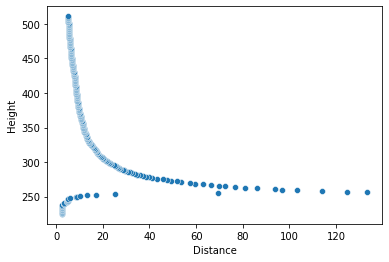

In [30]:
prior_simulation('64')
prior_dist_df_64 = pd.read_pickle('prior_dist_64')
sns.scatterplot(data=prior_dist_df_64, x="Distance", y="Height")

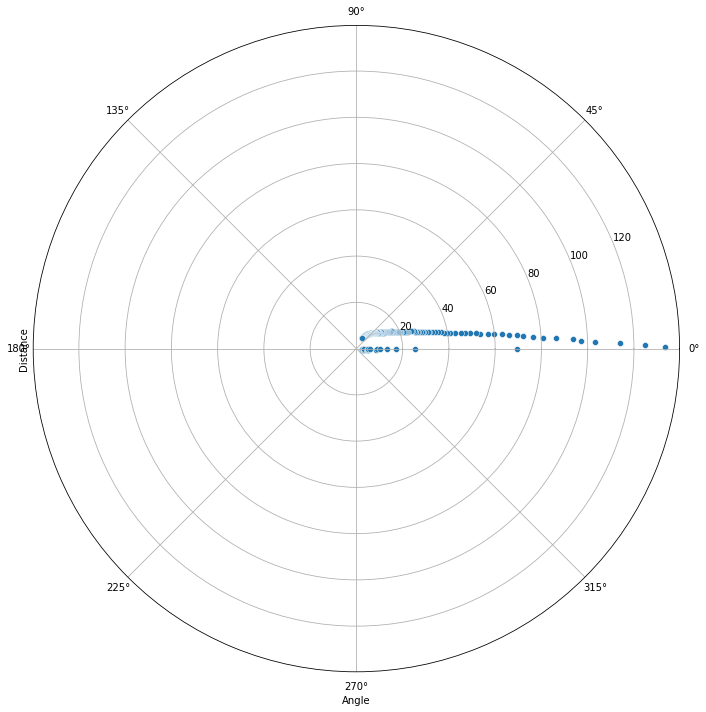

In [31]:
prior_dist_df_64["TransformedHeight"] = prior_dist_df_64["Height"] - 256
prior_dist_df_64["Angle"] = np.arctan((prior_dist_df_64["TransformedHeight"] + 0.5)/64)

# plot in polar coordinates
g = sns.FacetGrid(prior_dist_df_64, subplot_kws=dict(projection='polar'), height=10, despine=False)
g.map_dataframe(sns.scatterplot, x='Angle', y='Distance')
plt.show()

## f=128

<AxesSubplot:xlabel='Distance', ylabel='Height'>

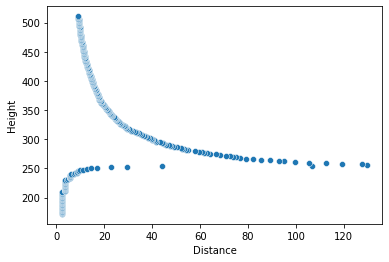

In [32]:
prior_simulation('128')
prior_dist_df_128 = pd.read_pickle('prior_dist_128-NoGround')
sns.scatterplot(data=prior_dist_df_128, x="Distance", y="Height")

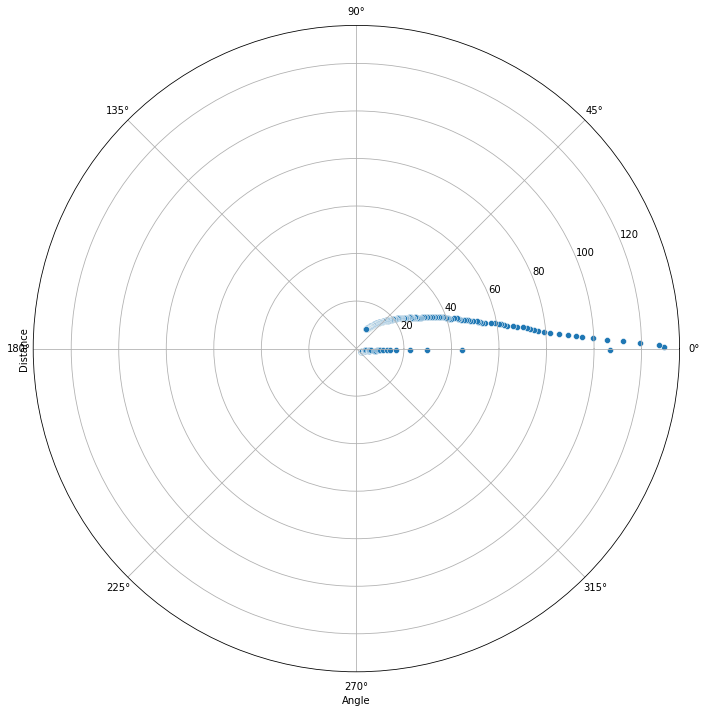

In [33]:
prior_dist_df_128["TransformedHeight"] = prior_dist_df_128["Height"] - 256
prior_dist_df_128["Angle"] = np.arctan((prior_dist_df_128["TransformedHeight"] + 0.5)/128)

# plot in polar coordinates
g = sns.FacetGrid(prior_dist_df_128, subplot_kws=dict(projection='polar'), height=10, despine=False)
g.map_dataframe(sns.scatterplot, x='Angle', y='Distance')
plt.show()

## f=1024

<AxesSubplot:xlabel='Distance', ylabel='Height'>

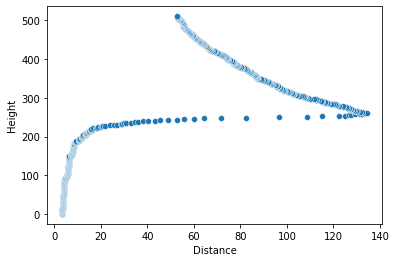

In [34]:
prior_simulation('1024')
prior_dist_df_1024 = pd.read_pickle('prior_dist_1024')
sns.scatterplot(data=prior_dist_df_1024, x="Distance", y="Height")

I think we need a plot using polar coordinates to match what Yang and Purves show in Figure 5c. The plot below seems qualitatively similar to their result for angles lower than eye level, but seems qualitatively different for angles

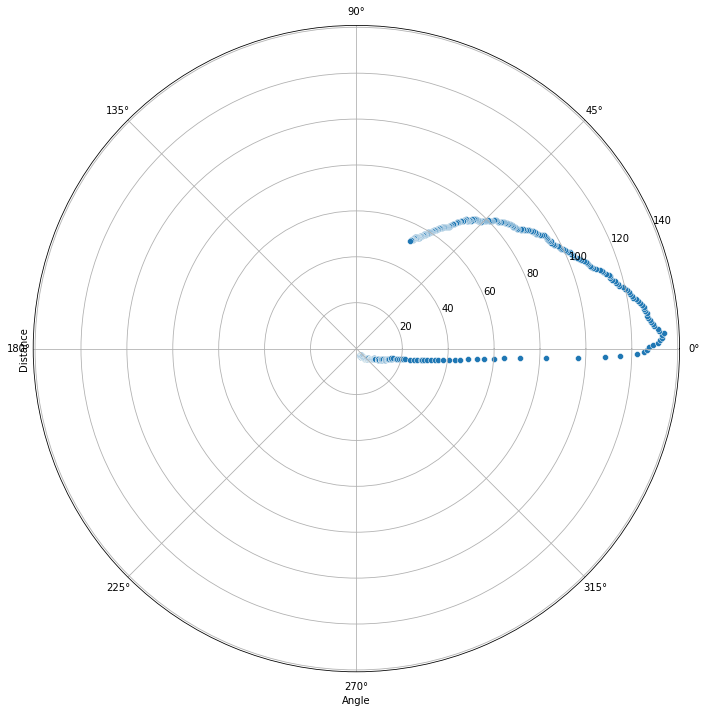

In [35]:
prior_dist_df_1024["TransformedHeight"] = prior_dist_df_1024["Height"] - 256
prior_dist_df_1024["Angle"] = np.arctan((prior_dist_df_1024["TransformedHeight"] + 0.5)/1024)

# plot in polar coordinates
g = sns.FacetGrid(prior_dist_df_1024, subplot_kws=dict(projection='polar'), height=10, despine=False)
g.map_dataframe(sns.scatterplot, x='Angle', y='Distance')
plt.show()

# Some Debugging

In [ ]:
data = np.load("../Snapshots/Snapshots-16/depth_475577.npy")
plt.imshow(data, cmap='gray')
plt.show()

In [ ]:
filenames = list(os.listdir(directory))
for row in range(prior.shape[0]):
    if (not np.isnan(prior[row]).all()):
        print(row)
        print(prior[row])


In [ ]:

for row in range(prior.shape[0]):
    print(row)
    print(prior[row])

In [ ]:

height = np.array(range(512))
data_dist = np.append(height[:, None], data_mean[:, None], axis=1)

column_values = ['Height', 'Distance']
  
# creating the dataframe
data_dist_df = pd.DataFrame(data = data_dist, 
                  columns = column_values)

sns.scatterplot(data=data_dist_df, x="Distance", y="Height")

In [ ]:
for filename in os.listdir(directory):
#     snapshot = np.flip(np.load(directory+filename), axis=0) # the deep map origin is on the top
    snapshot = np.load(directory+filename)# the deep map origin is on the top
    
    snapshot = snapshot[:, 255] # take the middle column
    if initialise is True:
        prior = snapshot
        initialise = False
    else:
        prior = np.vstack((prior, snapshot)) 

In [23]:
os.listdir(directory)

['depth_568083.npy',
 'depth_248120.npy',
 'depth_88477.npy',
 'depth_41878.npy',
 'depth_499278.npy',
 'depth_496163.npy',
 'depth_895949.npy',
 'depth_936990.npy',
 'depth_295962.npy',
 'depth_994276.npy',
 'depth_624190.npy',
 'depth_322064.npy',
 'depth_848453.npy',
 'depth_787613.npy',
 'depth_204706.npy',
 'depth_323178.npy',
 'depth_266356.npy',
 'depth_479950.npy',
 'depth_29118.npy',
 'depth_204277.npy',
 'depth_836365.npy',
 'depth_85556.npy',
 'depth_276636.npy',
 'depth_338559.npy',
 'depth_318306.npy',
 'depth_931152.npy',
 'depth_19596.npy',
 'depth_605836.npy',
 'depth_159453.npy',
 'depth_392942.npy',
 'depth_890011.npy',
 'depth_428707.npy',
 'depth_70642.npy',
 'depth_624556.npy',
 'depth_882978.npy',
 'depth_453000.npy',
 'depth_748473.npy',
 'depth_62291.npy',
 'depth_11257.npy',
 'depth_725853.npy',
 'depth_680237.npy',
 'depth_561065.npy',
 'depth_583786.npy',
 'depth_637299.npy',
 'depth_986507.npy',
 'depth_489295.npy',
 'depth_168288.npy',
 'depth_216705.npy',
